In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# cross validation parameters:
k = 6
M = [1,2,3,4,5,6]

In [2]:
# load data
def load_data():
    data = np.array(np.genfromtxt('galileo_ramp_data.csv', delimiter=','))
    data = np.random.permutation(data)
    return data

In [3]:
data = load_data()
data.shape

(6, 2)

In [4]:
def train_test_split(data, D, k):
    train_x, train_y = np.zeros([1,data.shape[0]-1])[0], np.zeros([1,data.shape[0]-1])[0]
    test_x, test_y = 0,0
    for i in range(k):
        if i != D:
            if i < D:
                train_x[i] = data[i][0]
                train_y[i] = data[i][1]

            else:
                train_x[i-1] = data[i][0]
                train_y[i-1] = data[i][1]                
        else:
            test_x = data[i][0]
            test_y = data[i][1]
            test_x = np.asarray(test_x)
            test_x = test_x[np.newaxis]
            test_y = np.asarray(test_y)
            test_y = test_y[np.newaxis]
            
    return train_x, train_y, test_x, test_y

In [5]:
# YOUR CODE GOES HERE takes poly features of the input 
def poly_features(x,D):
    F = np.zeros((len(x), D))
    for i in np.arange(len(x)):
        temp = 1
        for j in np.arange(D):
            F[i, j] = temp * x[i]
            temp = temp * x[i]
    F = F.T
    return F

In [6]:
# plot mse's over all D tested 
def plot_mse(train_mses, test_mses, deg):
    plt.plot(np.arange(1,np.size(train_mses)+1),train_mses,'ro--', color = 'yellow', label = 'train_mses')
    plt.plot(np.arange(1,np.size(test_mses)+1),test_mses,'ro--', color = 'blue', label = 'test_mses')
    plt.title('MSE on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('MSE       ', fontsize=18)
    plt.legend()

In [7]:
# run over all the degrees, fit each models, and calculate errors
def try_all_degs(data, deg_range, k):
    # generate nonlinear features
    train_mses, test_mses = [], []
    
    for D in np.arange(0,np.size(deg_range)):
        train_MSE = 0
        test_MSE = 0
        for i in range(k):
            
            train_x, train_y, test_x, test_y = train_test_split(data, i, k)
            # generate poly feature transformation
            train_F = poly_features(train_x,deg_range[D])
            test_F = poly_features(test_x,deg_range[D])

            # get weights for current model
            train_temp = np.linalg.pinv(np.dot(train_F,train_F.T))
            test_temp = np.linalg.pinv(np.dot(test_F,test_F.T))
            w = np.dot(np.dot(train_temp,train_F),train_y)
            train_MSE += np.linalg.norm(np.dot(train_F.T,w)-train_y)/np.size(train_y)
            test_MSE += np.linalg.norm(np.dot(test_F.T,w)-test_y)/np.size(test_y)
        
        train_mses.append(train_MSE)
        test_mses.append(test_MSE)
    # make plot of mse's
    fig = plt.figure(figsize = (7,7))
    plot_mse(train_mses, test_mses,deg_range)
    plt.show()

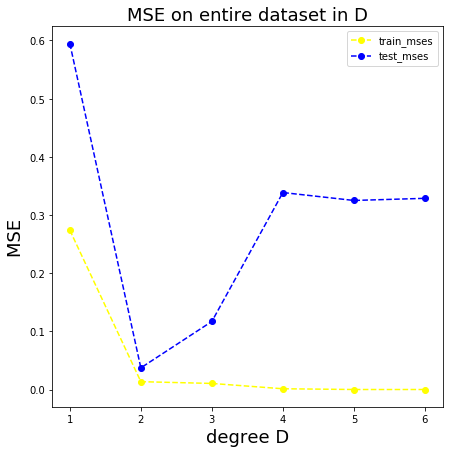

In [8]:
try_all_degs(data, M, k)